In [2]:
import pandas as pd
import geopandas as gpd

import requests, zipfile, io

# Unfälle

In [3]:
## downlaod and unzip (einmalig)

jahr="2019" # fuer berlin auch 2018 verfügbar

#zip_file_url="https://unfallatlas.statistikportal.de/app/UnfalldatenDownload/Unfallorte"+jahr+"_LinRef_csv.zip"
#r = requests.get(zip_file_url)
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()

data=pd.read_csv("csv/Unfallorte"+jahr+"_LinRef.txt", sep=';')

In [4]:
data

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
0,1,1,0,57,25,2019,1,5,5,3,...,1,0,0,0,0,"579075,960927323440000","6023531,318255106000000","10,216713530000050","54,353460244000075",1
1,2,1,0,3,0,2019,1,6,2,3,...,1,0,0,0,0,"611914,920398440210000","5968419,523143058600000","10,701388439000027","53,852200108000034",1
2,3,1,0,53,91,2019,1,7,6,3,...,1,0,0,0,0,"597807,670711245390000","5939158,772521587100000","10,477759560000038","53,592131367000036",1
3,4,1,0,62,76,2019,1,5,6,3,...,1,0,0,0,0,"570688,991616101940000","5957625,627219760800000","10,072328698000035","53,762448160000076",2
4,5,1,0,1,0,2019,1,8,5,3,...,1,0,0,0,0,"530059,818000000900000","6073467,298000000400000","9,467680689000076","54,807468400000062",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268365,268366,7,3,15,0,2019,12,18,1,3,...,0,1,0,0,0,"447451,870000000110000","5538758,230000002300000","8,266788796000071","49,998830410000039",1
268366,268367,7,3,15,0,2019,12,11,1,3,...,1,0,0,0,0,"447651,022998617960000","5539417,041274307300000","8,269477582000036","50,004772835000040",0
268367,268368,7,3,12,0,2019,12,12,7,3,...,1,0,0,0,0,"410972,391108420680000","5477309,075609600200000","7,771903968000061","49,441922803000068",1
268368,268369,7,3,18,0,2019,12,18,7,3,...,1,0,0,0,0,"458759,260020965710000","5463484,891345262500000","8,432482387000050","49,322701564000056",1


In [5]:
data.YGCSWGS84=data.YGCSWGS84.str.replace(',','.').astype(float)
data.XGCSWGS84=data.XGCSWGS84.str.replace(',','.').astype(float)

In [6]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.XGCSWGS84,data.YGCSWGS84), crs='EPSG:4326')

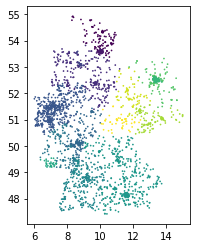

In [7]:
gdf[::100].plot(column='ULAND',markersize=0.5)

In [8]:
gdf_berlin=gdf[gdf.ULAND==11].copy()

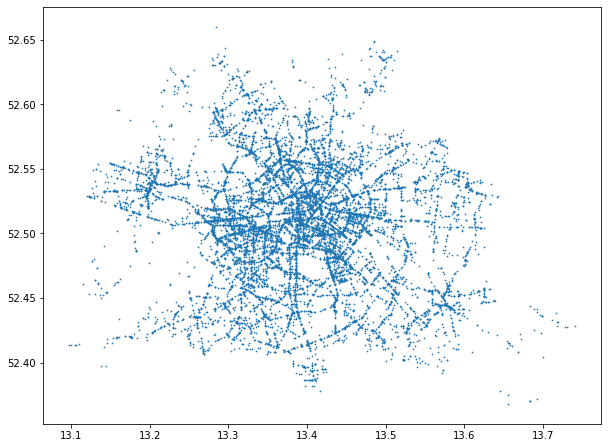

In [9]:
gdf_berlin.plot(markersize=0.5, figsize=(10,10))

# Verkehrsstärke

In [10]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/wfs_07_01verkmeng2014"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layer = list(wfs.contents)[-1]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer) #, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data_dtv = gpd.read_file(q)

data_dtv.head()

,gml_id,METER,STR_NAME,DTV,PKW,LKW,LIEFERWAGEN,LINIENBUSSE,REISEBUSSE,KRAD,HERKUNFT,geometry
0,wfs_07_01verkmeng2014.53670001_53670002,71,Alt-Buch,12960,10572,618,1322,230,32,186,"Verkehrsstärkenkarte 2014, VLB","LINESTRING (398257.364 5832698.211, 398290.273..."
1,wfs_07_01verkmeng2014.53670002_53670003,119,Alt-Buch,12960,10592,618,1322,210,32,186,"Verkehrsstärkenkarte 2014, VLB","LINESTRING (398324.724 5832720.497, 398335.699..."
2,wfs_07_01verkmeng2014.53670003_53670004,296,Alt-Buch,12960,10602,618,1322,200,32,186,"Verkehrsstärkenkarte 2014, VLB","LINESTRING (398437.824 5832759.259, 398454.167..."
3,wfs_07_01verkmeng2014.58480005_58480006,236,Alte Kaulsdorfer Str.,7258,6078,131,741,150,2,156,"Modellrechnung 2014, VMZ","LINESTRING (403377.118 5813297.220, 403379.105..."
4,wfs_07_01verkmeng2014.46550026_46550025,165,Alte Schönhauser Str.,2764,2242,80,282,0,16,144,"Zähldaten VLB, 20140916","LINESTRING (391884.118 5820618.870, 391898.317..."


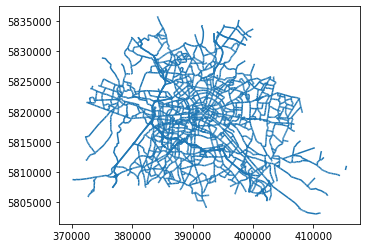

In [11]:
data_dtv.plot()

In [12]:
# Fasse Abschnitte mit gleichen DTV und Namen zusammen
data_dtv_diss=data_dtv.dissolve(by=['STR_NAME','DTV'])

In [13]:
data_dtv_diss=data_dtv_diss.reset_index()[['STR_NAME','DTV','geometry','HERKUNFT']].copy()

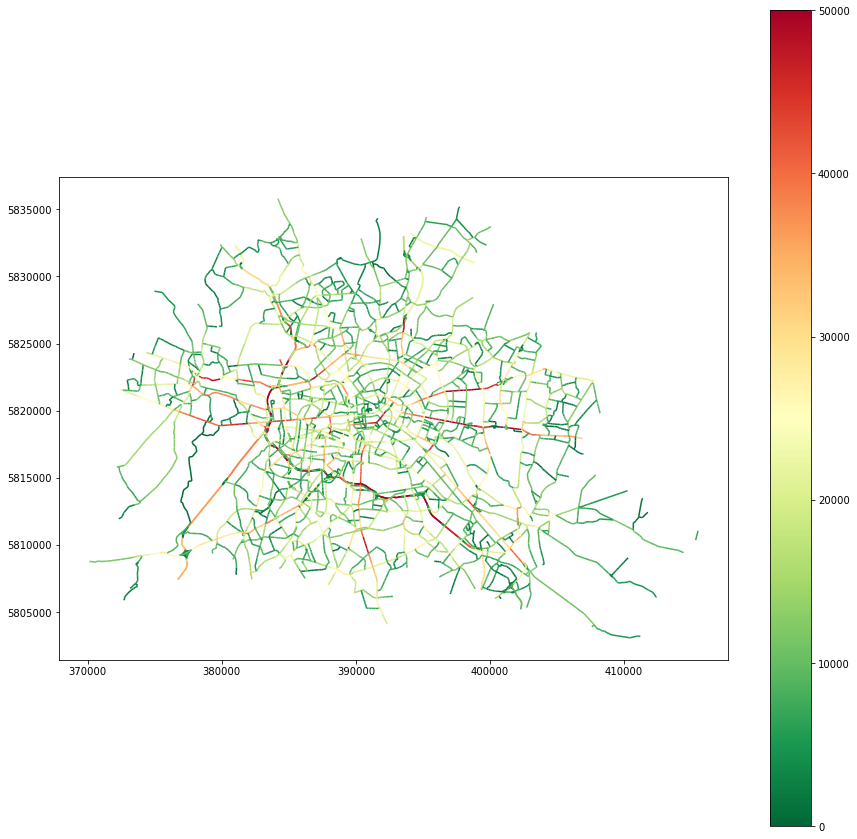

In [14]:
data_dtv_diss.plot(column='DTV', figsize=(15,15), cmap='RdYlGn_r', legend=True, vmax=50000)

# Unfälle den Straßenabschnitten mit der Verkehrsbelastung hinzufügen

In [16]:
dtv=data_dtv_diss.copy()

In [17]:
dtv.crs='EPSG:25833'

In [18]:
gdf_berlin=gdf_berlin.to_crs(dtv.crs)

In [19]:
dtv_buffer=dtv.copy()
dtv_buffer.geometry=dtv.buffer(15) # 15m buffer

In [20]:
sjoin=gpd.sjoin(dtv_buffer,gdf_berlin)

In [22]:
#sjoin.columns

In [23]:
unf_pro_abschnitt=sjoin.reset_index().groupby('index')['UREGBEZ'].count().reset_index()
unf_pro_abschnitt

,index,UREGBEZ
0,3,2
1,5,6
2,6,1
3,7,2
4,10,1
...,...,...
3328,3843,7
3329,3844,7
3330,3845,5
3331,3847,4


In [24]:
fin_merge=pd.merge(dtv.reset_index(), unf_pro_abschnitt)
fin_merge.head()

,index,STR_NAME,DTV,geometry,HERKUNFT,UREGBEZ
0,3,100 AD Charlottenburg Ausfahrt n Tegeler Weg,45798,"LINESTRING (383880.652 5821650.230, 383908.696...","Modellrechnung 2014, VMZ",2
1,5,100 AK Schöneberg Ausf n Grazer D v 100 Innsbr,8820,"LINESTRING (387779.609 5814802.134, 387764.304...","Verkehrsstärkenkarte 2014, VLB",6
2,6,100 AK Schöneberg Begleitfahrbahn A 100 n Osten,9150,"LINESTRING (388031.940 5815028.788, 388065.805...","Modellrechnung 2014, VMZ",1
3,7,100 AK Schöneberg Begleitfahrbahn A 100 n Osten,13074,"LINESTRING (387813.705 5815219.179, 387826.470...","Modellrechnung 2014, VMZ",2
4,10,100 AK Schöneberg Begleitfahrbahn A 100 n Westen,19609,"LINESTRING (388364.882 5815007.982, 388342.643...","Zähldaten VLB, 20140310",1


In [25]:
#abschnittslaenge berechnen
fin_merge['len']=fin_merge.geometry.apply(lambda x: x.length)

In [26]:
fin_merge['unf_pro_km']= (1000/fin_merge.len)*fin_merge.UREGBEZ
fin_merge.head()

,index,STR_NAME,DTV,geometry,HERKUNFT,UREGBEZ,len,unf_pro_km
0,3,100 AD Charlottenburg Ausfahrt n Tegeler Weg,45798,"LINESTRING (383880.652 5821650.230, 383908.696...","Modellrechnung 2014, VMZ",2,157.964987,12.661034
1,5,100 AK Schöneberg Ausf n Grazer D v 100 Innsbr,8820,"LINESTRING (387779.609 5814802.134, 387764.304...","Verkehrsstärkenkarte 2014, VLB",6,142.213011,42.190232
2,6,100 AK Schöneberg Begleitfahrbahn A 100 n Osten,9150,"LINESTRING (388031.940 5815028.788, 388065.805...","Modellrechnung 2014, VMZ",1,264.713717,3.777666
3,7,100 AK Schöneberg Begleitfahrbahn A 100 n Osten,13074,"LINESTRING (387813.705 5815219.179, 387826.470...","Modellrechnung 2014, VMZ",2,190.089588,10.521355
4,10,100 AK Schöneberg Begleitfahrbahn A 100 n Westen,19609,"LINESTRING (388364.882 5815007.982, 388342.643...","Zähldaten VLB, 20140310",1,272.693749,3.667117


In [27]:
fin_merge['unf_km_dtv']= (1000/fin_merge.DTV)*(1000/fin_merge.len)*fin_merge.UREGBEZ
fin_merge.head()

,index,STR_NAME,DTV,geometry,HERKUNFT,UREGBEZ,len,unf_pro_km,unf_km_dtv
0,3,100 AD Charlottenburg Ausfahrt n Tegeler Weg,45798,"LINESTRING (383880.652 5821650.230, 383908.696...","Modellrechnung 2014, VMZ",2,157.964987,12.661034,0.276454
1,5,100 AK Schöneberg Ausf n Grazer D v 100 Innsbr,8820,"LINESTRING (387779.609 5814802.134, 387764.304...","Verkehrsstärkenkarte 2014, VLB",6,142.213011,42.190232,4.783473
2,6,100 AK Schöneberg Begleitfahrbahn A 100 n Osten,9150,"LINESTRING (388031.940 5815028.788, 388065.805...","Modellrechnung 2014, VMZ",1,264.713717,3.777666,0.412860
3,7,100 AK Schöneberg Begleitfahrbahn A 100 n Osten,13074,"LINESTRING (387813.705 5815219.179, 387826.470...","Modellrechnung 2014, VMZ",2,190.089588,10.521355,0.804754
4,10,100 AK Schöneberg Begleitfahrbahn A 100 n Westen,19609,"LINESTRING (388364.882 5815007.982, 388342.643...","Zähldaten VLB, 20140310",1,272.693749,3.667117,0.187012


In [143]:
import numpy as np
fin_merge=fin_merge.replace([np.inf, -np.inf], np.nan)

In [28]:
#fin_merge.sort_values('unf_km_dtv', ascending=False)[:100]

# VIZ

In [29]:
import folium
import branca


#df=fin_merge[fin_merge.DTV>500].sort_values('unf_km_dtv', ascending=False)[:700].copy()
df=fin_merge[fin_merge.DTV>500].sort_values('unf_km_dtv', ascending=False).copy()
df.unf_pro_km=df.unf_pro_km.round(1)
df.unf_km_dtv=df.unf_km_dtv.round(1)

#df.rename(columns={'STR_NAME':'Straßenname','DTV':'durchschn. tägliche Verkehrstärke (DTV)','HERKUNFT':'DTV Quelle','UREGBEZ':'Anzahl Unfälle','unf_pro_km':'Unfälle pro km','unf_km_dtv':'Unfälle pro Tausend Fzg pro km'})


field='unf_km_dtv'

m = folium.Map(location=[52.5, 13.4], zoom_start=12, tiles='cartodbpositron')


colorscale = branca.colormap.LinearColormap(['gray','orange','red','red'], index=[2,4,10,df[field].max()], vmin=(df[field]).min(), vmax=15, caption=field)
#colorscale = branca.colormap.LinearColormap(['gray','orange','red','red'], index=[2,4,10,df[field].max()], caption=field)


def style_function(feature):
    unf_dtv=feature['properties'][field]
    dtv=feature['properties']['DTV']
    return {
        #'opacity': 0.9 if unf_dtv>4 else 0.55,
        'opacity': 0.8,
        'weight': (dtv/8000)+3,
        'color': 'lightgrey' if unf_dtv is None else colorscale(unf_dtv)
    }

def highlight_function(feature):
    dtv=feature['properties']['DTV']
    return {
         'weight': (dtv/8000)+7 ,
        'color': 'black',
        'dashArray': '5, 5'
    }


folium.GeoJson(
    df,
    name='Unfälle pro Tausend Kfz pro km',
    tooltip=folium.GeoJsonTooltip(fields=['STR_NAME', 'DTV', 'HERKUNFT', 'UREGBEZ','unf_pro_km', 'unf_km_dtv'], 
                                  aliases=['Straßenname','durchschn. tägliche Verkehrstärke (DTV)','DTV Quelle','Anzahl Unfälle','Unfälle pro km','Unfälle pro Tausend Kfz pro km']),
   style_function=style_function,
    highlight_function=highlight_function
).add_to(m)

#colorscale2 = branca.colormap.LinearColormap(['gray','orange','red','red'], vmin=0, vmax=150000, caption=field)
#def style_function2(feature):
#    #unf_dtv=feature['properties'][field]
#    dtv=feature['properties']['DTV']
#    return {
#        #'opacity': 0.9 if unf_dtv>4 else 0.55,
#        'opacity': 0.8,
#        'weight': (dtv/8000)+3,
#        'color': 'lightgrey' if dtv is None else colorscale2(dtv)
#    }
#
#folium.GeoJson(
#    df,
#    name='DTV',
#    #tooltip=folium.GeoJsonTooltip(fields=['STR_NAME', 'DTV', 'HERKUNFT', 'UREGBEZ','unf_pro_km', 'unf_km_dtv'], 
#    #                              aliases=['Straßenname','durchschn. tägliche Verkehrstärke (DTV)','DTV Quelle','Anzahl Unfälle','Unfälle pro km','Unfälle pro Tausend Kfz pro km']),
#   style_function=style_function2,
#    #highlight_function=highlight_function
#).add_to(m)


folium.raster_layers.WmsTileLayer(
    url='http://www.wms.nrw.de/wms/unfallatlas',
    name='Unfallorte_2019',
    fmt='image/png',
    layers='Unfallorte_2019',
    attr=u'Statistische Ämter des Bundes und der Länder',
    transparent=True,
    overlay=True,
    control=True,
).add_to(m)

#folium.raster_layers.WmsTileLayer(
#    url='https://fbinter.stadt-berlin.de/fb/wms/senstadt/wmsk_07_01verkmeng2014',
#    name='Unfallorte_2019',
#    fmt='image/png',
#    layers='Unfallorte_2019',
#    attr=u'Statistische Ämter des Bundes und der Länder',
#    transparent=True,
#    overlay=True,
#    control=True,
#).add_to(m)

colorscale.caption = 'Unfälle pro Tausend Kfz pro km'
m.add_child(colorscale)

folium.LayerControl().add_to(m)


m.save('output_unfaelle_dtv_2019.html')
#m